<IPython.core.display.Javascript object>


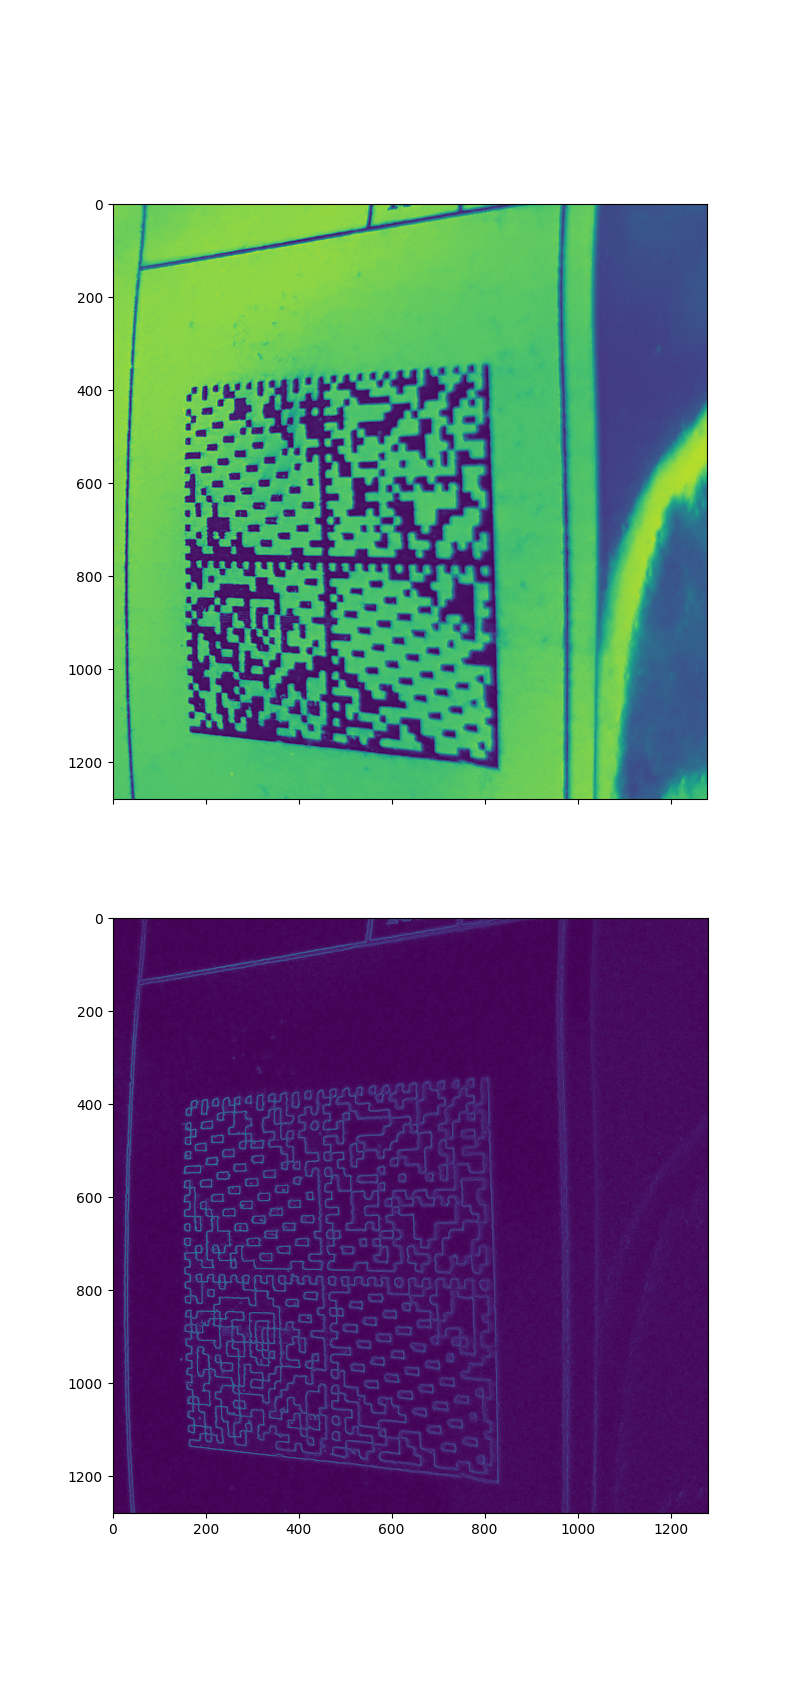

<IPython.core.display.Javascript object>


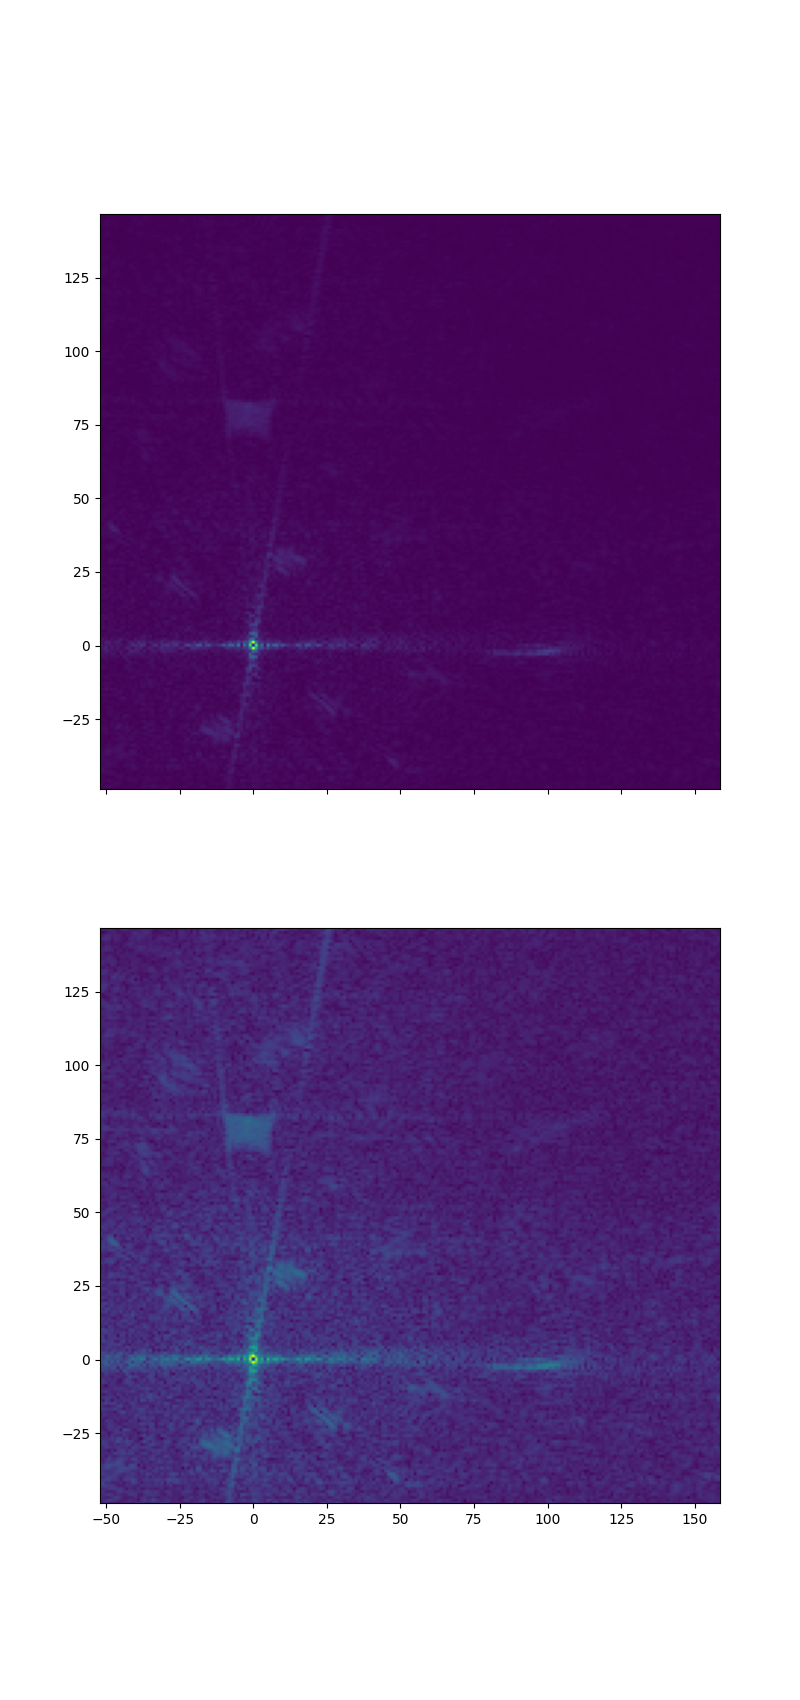

<IPython.core.display.Javascript object>


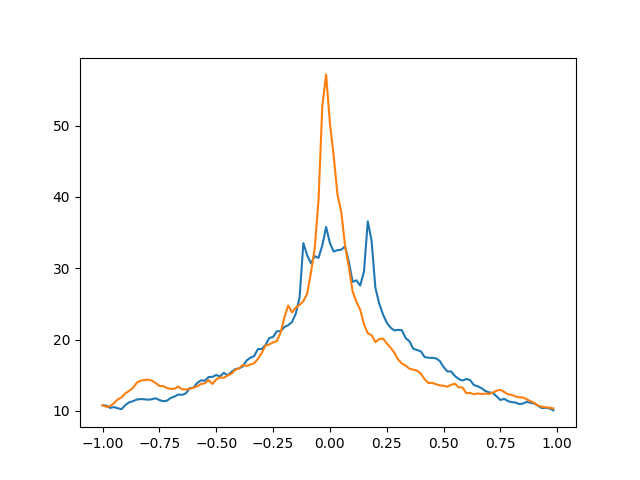

    5     0  0.600 1.6339095613164578
   -5     0  0.600 1.6106198874718465
    0     4  0.485 1.3372467435095516
    0    -4  0.485 1.594563364295328
    7     0  0.463 1.4579320025505713
   -7     0  0.463 1.4374918313254308
    8     0  0.448 1.2893974974394884
   -8     0  0.448 0.8168311018142846
   10     0  0.394 1.1994429079740756
  -10     0  0.394 0.9718603089678752
   18     0  0.388 0.6611245187836234
  -18     0  0.388 0.8602609123052547
    1     4  0.383 1.020263563950217
   19     0  0.357 0.7575802702539254
  -19     0  0.357 0.8386812869877319
    1    -4  0.354 0.901184607493342
   15     0  0.346 0.906865176745161
  -15     0  0.346 0.7688739283613537
   22     0  0.328 0.6264332111405387
  -22     0  0.328 0.6350057423875253
Sorted by metric
   22     0  0.328 0.6264332111405387
  -22     0  0.328 0.6350057423875253
   18     0  0.388 0.6611245187836234
   19     0  0.357 0.7575802702539254
  -15     0  0.346 0.7688739283613537
   -8     0  0.448 0.8168311018142846

In [1]:
import sys

sys.path.append('..')

%matplotlib notebook
from edge_frequency_analysis import EdgeFrequencyAnalysis

im6 = EdgeFrequencyAnalysis("../images/20200525_003816.jpg")
im6.crop(1900, 800, 1280, 1280)
im6.analyze()
im6.analyze_slopes()
im6.list_maximums(40)

0 0 0.00978974205722094 0.00978974205722094 -4 -4
0 0 0.08032119289479989 0.31024089467109994 -4 -3
0 0 0.14407649327028837 0.5720382466351441 -4 -2
0 0 0.19051047312679537 0.7976276182816988 -4 -1
0 0 0.19051047312679537 0.7976276182816988 -4 1
0 0 0.14407649327028837 0.5720382466351441 -4 2
0 0 0.08032119289479989 0.31024089467109994 -4 3
0 0 0.00978974205722094 0.00978974205722094 -4 4
0 0 0.31024089467109994 0.08032119289479989 -3 -4
0 0 0.3806346233079647 0.3806346233079647 -3 -3
0 0 0.4503679948296707 0.6335786632197804 -3 -2
0 0 0.4503679948296707 0.6335786632197804 -3 2
0 0 0.3806346233079647 0.3806346233079647 -3 3
0 0 0.31024089467109994 0.08032119289479989 -3 4
0 0 0.5720382466351441 0.14407649327028837 -2 -4
0 0 0.6335786632197804 0.4503679948296707 -2 -3
0 0 0.6335786632197804 0.4503679948296707 -2 3
0 0 0.5720382466351441 0.14407649327028837 -2 4
0 0 0.7976276182816988 0.19051047312679537 -1 -4
0 0 0.7976276182816988 0.19051047312679537 -1 4
0 0 0.8094895268732046 0.19051

<IPython.core.display.Javascript object>


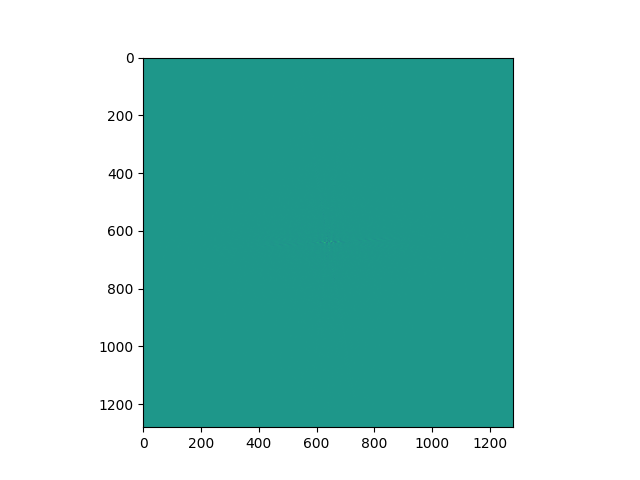

In [5]:
import numpy, math
import itertools

# This assumes square
x_size, y_size = im6.edges_f.shape

inverse_edge_f = numpy.zeros((x_size, y_size)).astype(complex)
#count = numpy.ones((x_size, y_size))

# !!!!!! Should this be abs or not
#edges_shifted = numpy.fft.fftshift(abs(im6.edges_f)) / im6.edges_f.size
edges_shifted = im6.edges_f / im6.edges_f.size
x,y = numpy.mgrid[-x_size//2:x_size//2, -y_size//2:y_size//2]

# 1/x, 1/y - if 1/x goes to 1.2 we want 80% in bin 1, 20% in bin 2, same w/ y
for x_, y_ in zip(x.flatten(),y.flatten()):
    if abs(x_) + abs(y_) < 5:
        continue
        
    value = edges_shifted[x_, y_]
    #value -= 0.01
    #if value < 0:
    #    continue
        
    #thing = x_size / (x_**2 + y_**2)
    thing = math.log(x_**2 + y_**2) / 14
    inverse_x = thing*x_
    inverse_y = thing*y_
    
    target_low_x = math.floor(inverse_x)
    target_low_y = math.floor(inverse_y)
    
    high_x_weight = inverse_x - target_low_x
    high_y_weight = inverse_y - target_low_y
    
    low_x_weight = 1 - high_x_weight
    low_y_weight = 1 - high_y_weight
    
    for (a, b), (c, d) in zip(itertools.product([target_low_x, target_low_x+1],
                                                [target_low_y, target_low_y+1]),
                              itertools.product([low_y_weight, high_x_weight],
                                                [low_y_weight, high_y_weight])):
        if a >= x_size:
            a -= x_size
        if b >= y_size:
            b -= y_size
        if (a == 0 or a == -x_size) and (b == 0 or b == -y_size):
            print(a, b, c, d, x_, y_)
        inverse_edge_f[a, b] += c * d * value # / (x_**2 + y_**2) ** 0.5
        #count[a, b] += 1

import matplotlib.pyplot
figure = matplotlib.pyplot.figure()
axes = figure.add_subplot(1,1,1)
axes.imshow(numpy.real(numpy.fft.fftshift(numpy.log(inverse_edge_f+1))))
figure.show()

<IPython.core.display.Javascript object>


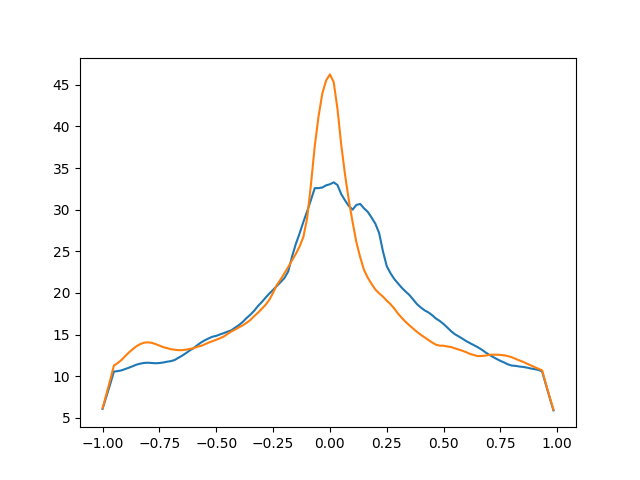

In [7]:
resolution = 60

# Making the assumption this is square, if not...
x_size, y_size = im6.edges_f.shape
abs_edges_f = abs(im6.edges_f) / x_size / y_size

# Kill the noise near DC
abs_edges_f[0:4,0:4] *= 0
abs_edges_f[-3:,0:4] *= 0
abs_edges_f[0:4,-3:] *= 0
abs_edges_f[-3:,-3:] *= 0

slopes = [_/resolution for _ in range(-resolution,resolution)]
y_results = [] # y = slope * x
x_results = [] # x = slope * y

for slope in slopes:
    y_result = 0
    x_result = 0
    for i in range(x_size//2):
        for j in range(-1, 2):
            a, b = i, (round(slope*i)+j)%x_size
            if a > x_size // 2:
                a -= x_size
            if b > x_size // 2:
                b -= x_size
            y_result += abs_edges_f[a, b]
            x_result += abs_edges_f[b, a]
    y_results.append(y_result)
    x_results.append(x_result)


figure, axeses = matplotlib.pyplot.subplots(1,1)
axeses.plot(slopes, numpy.convolve(y_results, numpy.ones(7)/7, mode='same'))
axeses.plot(slopes, numpy.convolve(x_results, numpy.ones(7)/7, mode='same'))
figure.show()

<IPython.core.display.Javascript object>


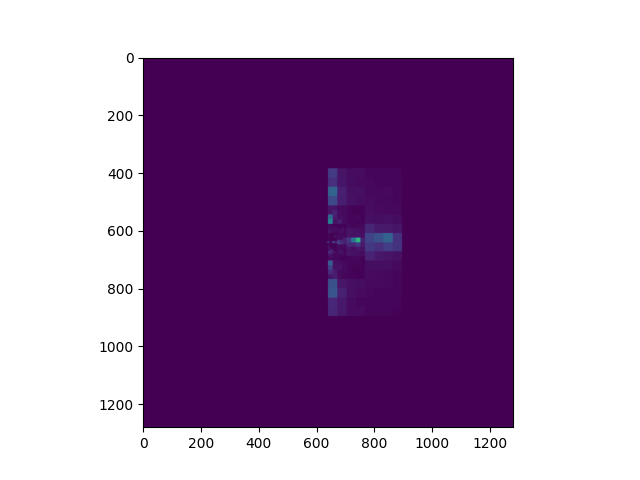

1 0 1.9983892639725105
-1 0 1.9983892639725105
0 96 1.305476671732562
0 1 1.2871464607732799
0 1 1.2871464607732799
-64 0 0.9169974378270285
0 80 0.7584678512591757
-80 0 0.6855406843959019
-160 0 0.6334036591398179
0 192 0.6297406058654055


In [11]:
new_edges_f = abs(im6.edges_f)/im6.edges_f.size
new_edges_f = new_edges_f ** 2

# TODO: Make symmetric
parameters = [(0, 4, 1),
              #(2, 4, 1),
              (4, 8, 1),
              (8, 16, 2),
              (16, 32, 4),
              (32, 64, 8),
              (64, 128, 16),
              (128, 256, 32),
             ]

results = []

for a, b, c in parameters:
    for i in range(a,b,c):
        for j in range(0,b,c):
            positive = 0
            negative = 0

            for k in range(i,i+c):
                for l in range(j, j+c):
                    positive += new_edges_f[k, l]
                    negative += new_edges_f[-k, l]
                    
            results.append((positive, i, j))
            results.append((negative, -i, j))
                    
            for k in range(i,i+c):
                for l in range(j, j+c):
                    new_edges_f[k, l] = positive
                    new_edges_f[-k, l] = negative
                    
    for i in range(0,a,c):
        for j in range(a,b,c):
            positive = 0
            negative = 0

            for k in range(i,i+c):
                for l in range(j, j+c):
                    positive += new_edges_f[k, l]
                    negative += new_edges_f[-k, l]

            results.append((positive, i, j))
            results.append((negative, -i, j))
                    
            for k in range(i,i+c):
                for l in range(j, j+c):
                    new_edges_f[k, l] = positive
                    new_edges_f[-k, l] = negative
    

figure, axeses = matplotlib.pyplot.subplots(1,1)
axeses.imshow(numpy.fft.fftshift(new_edges_f))
figure.show()

for value, x, y in reversed(sorted(results)[-10:]):
    print(x, y, value)